In [2]:
import numpy as np
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
pd.set_option("display.max_columns",None)

In [3]:
#Lets load the data series
raw_data=pd.read_csv("./Indian_Traffic_Violations.csv")
raw_data.head()


,Violation_ID,Violation_Type,Fine_Amount,Location,Date,Time,Vehicle_Type,Vehicle_Color,Vehicle_Model_Year,Registration_State,Driver_Age,Driver_Gender,License_Type,Penalty_Points,Weather_Condition,Road_Condition,Officer_ID,Issuing_Agency,License_Validity,Number_of_Passengers,Helmet_Worn,Seatbelt_Worn,Traffic_Light_Status,Speed_Limit,Recorded_Speed,Alcohol_Level,Breathalyzer_Result,Towed,Fine_Paid,Payment_Method,Court_Appearance_Required,Previous_Violations,Comments
0,VLT100000,Overloading,4544,Karnataka,2023-01-01,23:02,Car,Red,2012,West Bengal,25,Male,Commercial,5,Cloudy,Slippery,OFF9971,Local Police,Valid,4,NaN,Yes,Green,100,95,0.03,Negative,Yes,No,Online,Yes,3,Repeat Offender
1,VLT100001,Driving Without License,2776,Punjab,2023-01-02,00:42,Scooter,Silver,2010,Tamil Nadu,32,Female,Commercial,4,Rainy,Dry,OFF6000,Highway Patrol,Valid,4,NaN,No,Green,40,48,0.45,Negative,Yes,Yes,Online,No,2,Repeat Offender
2,VLT100002,Using Mobile Phone,4785,Maharashtra,2023-01-03,04:32,Scooter,Grey,2006,Tamil Nadu,67,Female,Two-Wheeler,8,Clear,Potholes,OFF5706,Local Police,Valid,5,Yes,Yes,Yellow,80,26,0.31,Not Conducted,No,No,Not Paid,Yes,4,NaN
3,VLT100003,No Seatbelt,1138,Uttar Pradesh,2023-01-04,15:06,Car,Green,1996,Uttar Pradesh,46,Male,Learner,3,Rainy,Wet,OFF5575,Highway Patrol,Valid,2,No,No,Green,100,115,0.09,Not Conducted,No,Yes,Online,No,5,Repeat Offender
4,VLT100004,Over-speeding,1610,Karnataka,2023-01-05,06:57,Truck,Yellow,2016,Delhi,63,Female,Four-Wheeler,4,Foggy,Potholes,OFF7147,Traffic Police,Valid,4,NaN,No,Red,30,115,0.28,Positive,No,Yes,Cash,Yes,0,NaN


In [4]:
raw_data.shape
raw_data.columns

Index(['Violation_ID', 'Violation_Type', 'Fine_Amount', 'Location', 'Date',
       'Time', 'Vehicle_Type', 'Vehicle_Color', 'Vehicle_Model_Year',
       'Registration_State', 'Driver_Age', 'Driver_Gender', 'License_Type',
       'Penalty_Points', 'Weather_Condition', 'Road_Condition', 'Officer_ID',
       'Issuing_Agency', 'License_Validity', 'Number_of_Passengers',
       'Helmet_Worn', 'Seatbelt_Worn', 'Traffic_Light_Status', 'Speed_Limit',
       'Recorded_Speed', 'Alcohol_Level', 'Breathalyzer_Result', 'Towed',
       'Fine_Paid', 'Payment_Method', 'Court_Appearance_Required',
       'Previous_Violations', 'Comments'],
      dtype='object')

In [5]:
cleaned_data_frame=raw_data[['Violation_Type', 'Fine_Amount', 'Location', 'Date', 'Vehicle_Type',
       'Registration_State', 'Driver_Age', 'Driver_Gender', 'License_Type','Weather_Condition', 'Road_Condition', 'Officer_ID',
       'Issuing_Agency', 'License_Validity', 
       'Helmet_Worn', 'Seatbelt_Worn', 'Traffic_Light_Status', 'Speed_Limit',
       'Recorded_Speed', 'Alcohol_Level', 'Court_Appearance_Required',
       'Previous_Violations', 'Comments']]

cleaned_data_frame.head()

,Violation_Type,Fine_Amount,Location,Date,Vehicle_Type,Registration_State,Driver_Age,Driver_Gender,License_Type,Weather_Condition,Road_Condition,Officer_ID,Issuing_Agency,License_Validity,Helmet_Worn,Seatbelt_Worn,Traffic_Light_Status,Speed_Limit,Recorded_Speed,Alcohol_Level,Court_Appearance_Required,Previous_Violations,Comments
0,Overloading,4544,Karnataka,2023-01-01,Car,West Bengal,25,Male,Commercial,Cloudy,Slippery,OFF9971,Local Police,Valid,NaN,Yes,Green,100,95,0.03,Yes,3,Repeat Offender
1,Driving Without License,2776,Punjab,2023-01-02,Scooter,Tamil Nadu,32,Female,Commercial,Rainy,Dry,OFF6000,Highway Patrol,Valid,NaN,No,Green,40,48,0.45,No,2,Repeat Offender
2,Using Mobile Phone,4785,Maharashtra,2023-01-03,Scooter,Tamil Nadu,67,Female,Two-Wheeler,Clear,Potholes,OFF5706,Local Police,Valid,Yes,Yes,Yellow,80,26,0.31,Yes,4,NaN
3,No Seatbelt,1138,Uttar Pradesh,2023-01-04,Car,Uttar Pradesh,46,Male,Learner,Rainy,Wet,OFF5575,Highway Patrol,Valid,No,No,Green,100,115,0.09,No,5,Repeat Offender
4,Over-speeding,1610,Karnataka,2023-01-05,Truck,Delhi,63,Female,Four-Wheeler,Foggy,Potholes,OFF7147,Traffic Police,Valid,NaN,No,Red,30,115,0.28,Yes,0,NaN


In [6]:
cleaned_data_frame.shape

(4000, 23)

In [7]:
cleaned_data_frame.dtypes

Violation_Type                object
Fine_Amount                    int64
Location                      object
Date                          object
Vehicle_Type                  object
Registration_State            object
Driver_Age                     int64
Driver_Gender                 object
License_Type                  object
Weather_Condition             object
Road_Condition                object
Officer_ID                    object
Issuing_Agency                object
License_Validity              object
Helmet_Worn                   object
Seatbelt_Worn                 object
Traffic_Light_Status          object
Speed_Limit                    int64
Recorded_Speed                 int64
Alcohol_Level                float64
Court_Appearance_Required     object
Previous_Violations            int64
Comments                      object
dtype: object

In [8]:
cleaned_data_frame["Year"]=cleaned_data_frame["Date"].str.split("-").str[0].copy()
cleaned_data_frame.head()
cleaned_data_frame.drop(columns="Date").copy()
cleaned_data_frame.head()


C:\Users\USER\AppData\Local\Temp\ipykernel_17260\3214029363.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_data_frame["Year"]=cleaned_data_frame["Date"].str.split("-").str[0].copy()


,Violation_Type,Fine_Amount,Location,Date,Vehicle_Type,Registration_State,Driver_Age,Driver_Gender,License_Type,Weather_Condition,Road_Condition,Officer_ID,Issuing_Agency,License_Validity,Helmet_Worn,Seatbelt_Worn,Traffic_Light_Status,Speed_Limit,Recorded_Speed,Alcohol_Level,Court_Appearance_Required,Previous_Violations,Comments,Year
0,Overloading,4544,Karnataka,2023-01-01,Car,West Bengal,25,Male,Commercial,Cloudy,Slippery,OFF9971,Local Police,Valid,NaN,Yes,Green,100,95,0.03,Yes,3,Repeat Offender,2023
1,Driving Without License,2776,Punjab,2023-01-02,Scooter,Tamil Nadu,32,Female,Commercial,Rainy,Dry,OFF6000,Highway Patrol,Valid,NaN,No,Green,40,48,0.45,No,2,Repeat Offender,2023
2,Using Mobile Phone,4785,Maharashtra,2023-01-03,Scooter,Tamil Nadu,67,Female,Two-Wheeler,Clear,Potholes,OFF5706,Local Police,Valid,Yes,Yes,Yellow,80,26,0.31,Yes,4,NaN,2023
3,No Seatbelt,1138,Uttar Pradesh,2023-01-04,Car,Uttar Pradesh,46,Male,Learner,Rainy,Wet,OFF5575,Highway Patrol,Valid,No,No,Green,100,115,0.09,No,5,Repeat Offender,2023
4,Over-speeding,1610,Karnataka,2023-01-05,Truck,Delhi,63,Female,Four-Wheeler,Foggy,Potholes,OFF7147,Traffic Police,Valid,NaN,No,Red,30,115,0.28,Yes,0,NaN,2023


Text(0.5, 1.0, 'Number of Vehicles')

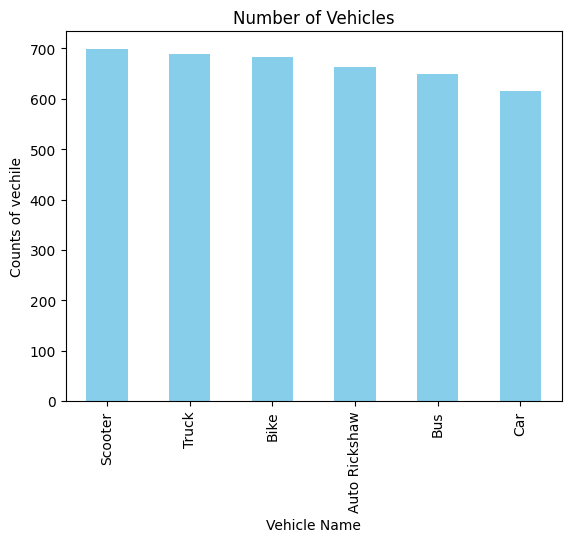

In [9]:
cleaned_data_frame.drop(["Officer_ID","Comments","Helmet_Worn","Seatbelt_Worn","Date"],axis=1)
ax1=cleaned_data_frame["Vehicle_Type"].value_counts().plot(kind="bar",color="skyblue")
ax1.set_ylabel("Counts of vechile")
ax1.set_xlabel("Vehicle Name")
ax1.set_title("Number of Vehicles")


In [10]:
cleaned_data_frame["Violation_Type"].astype("category").cat.codes
cleaned_data_frame.head(5)

,Violation_Type,Fine_Amount,Location,Date,Vehicle_Type,Registration_State,Driver_Age,Driver_Gender,License_Type,Weather_Condition,Road_Condition,Officer_ID,Issuing_Agency,License_Validity,Helmet_Worn,Seatbelt_Worn,Traffic_Light_Status,Speed_Limit,Recorded_Speed,Alcohol_Level,Court_Appearance_Required,Previous_Violations,Comments,Year
0,Overloading,4544,Karnataka,2023-01-01,Car,West Bengal,25,Male,Commercial,Cloudy,Slippery,OFF9971,Local Police,Valid,NaN,Yes,Green,100,95,0.03,Yes,3,Repeat Offender,2023
1,Driving Without License,2776,Punjab,2023-01-02,Scooter,Tamil Nadu,32,Female,Commercial,Rainy,Dry,OFF6000,Highway Patrol,Valid,NaN,No,Green,40,48,0.45,No,2,Repeat Offender,2023
2,Using Mobile Phone,4785,Maharashtra,2023-01-03,Scooter,Tamil Nadu,67,Female,Two-Wheeler,Clear,Potholes,OFF5706,Local Police,Valid,Yes,Yes,Yellow,80,26,0.31,Yes,4,NaN,2023
3,No Seatbelt,1138,Uttar Pradesh,2023-01-04,Car,Uttar Pradesh,46,Male,Learner,Rainy,Wet,OFF5575,Highway Patrol,Valid,No,No,Green,100,115,0.09,No,5,Repeat Offender,2023
4,Over-speeding,1610,Karnataka,2023-01-05,Truck,Delhi,63,Female,Four-Wheeler,Foggy,Potholes,OFF7147,Traffic Police,Valid,NaN,No,Red,30,115,0.28,Yes,0,NaN,2023


Text(0.5, 0, 'Location[Staewise]')

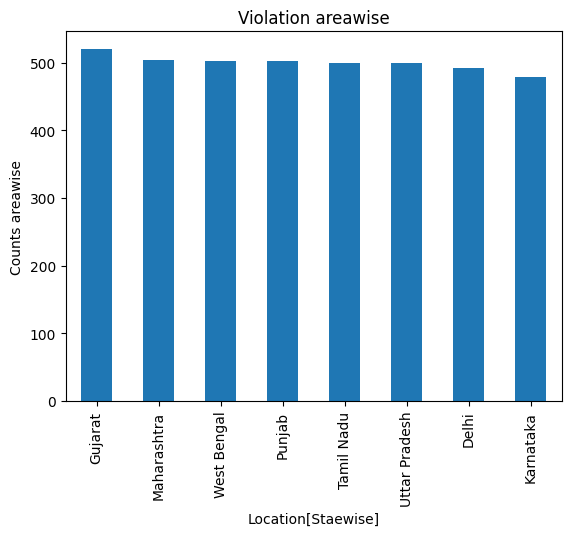

In [11]:

ax1=cleaned_data_frame["Location"].value_counts().plot(kind="bar",title="Violation areawise")
ax1.set_ylabel("Counts areawise")
ax1.set_facecolor("white")
ax1.set_xlabel("Location[Staewise]")

In [12]:
cleaned_data_frame.head(2)

,Violation_Type,Fine_Amount,Location,Date,Vehicle_Type,Registration_State,Driver_Age,Driver_Gender,License_Type,Weather_Condition,Road_Condition,Officer_ID,Issuing_Agency,License_Validity,Helmet_Worn,Seatbelt_Worn,Traffic_Light_Status,Speed_Limit,Recorded_Speed,Alcohol_Level,Court_Appearance_Required,Previous_Violations,Comments,Year
0,Overloading,4544,Karnataka,2023-01-01,Car,West Bengal,25,Male,Commercial,Cloudy,Slippery,OFF9971,Local Police,Valid,NaN,Yes,Green,100,95,0.03,Yes,3,Repeat Offender,2023
1,Driving Without License,2776,Punjab,2023-01-02,Scooter,Tamil Nadu,32,Female,Commercial,Rainy,Dry,OFF6000,Highway Patrol,Valid,NaN,No,Green,40,48,0.45,No,2,Repeat Offender,2023


In [13]:
cleaned_data_frame.Driver_Age.corr(cleaned_data_frame.Fine_Amount)



np.float64(0.006102380428190288)

<Axes: >

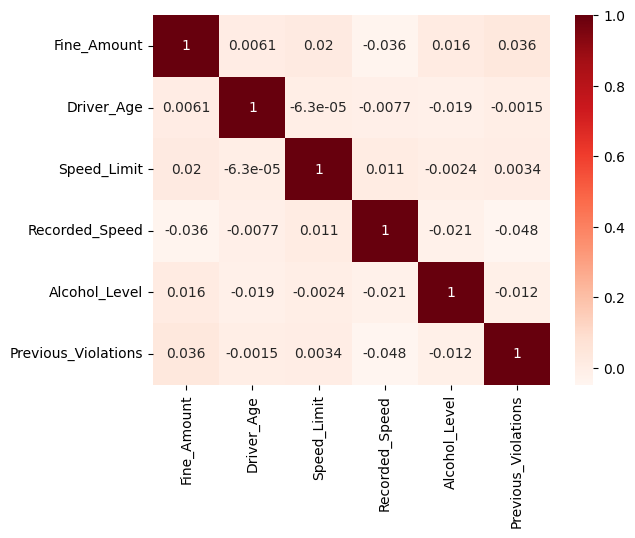

In [14]:
numerical_dataframe = cleaned_data_frame.select_dtypes(include=['number'])  # Fixed

sns.heatmap(numerical_dataframe.corr(),cmap="Reds",annot=True)


In [15]:
cleaned_data_frame.describe()

,Fine_Amount,Driver_Age,Speed_Limit,Recorded_Speed,Alcohol_Level,Previous_Violations
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.00000
mean,2529.821250,46.658000,59.817500,69.479000,0.251408,2.47750
std,1417.415712,16.865858,23.633267,29.394652,0.143744,1.71398
min,100.000000,18.000000,30.000000,20.000000,0.000000,0.00000
25%,1280.750000,32.000000,40.000000,43.000000,0.130000,1.00000
50%,2506.000000,47.000000,60.000000,70.000000,0.250000,2.00000
75%,3733.000000,61.000000,80.000000,95.000000,0.380000,4.00000
max,5000.000000,75.000000,100.000000,120.000000,0.500000,5.00000


In [16]:
numerical_dataframe

,Fine_Amount,Driver_Age,Speed_Limit,Recorded_Speed,Alcohol_Level,Previous_Violations
0,4544,25,100,95,0.03,3
1,2776,32,40,48,0.45,2
2,4785,67,80,26,0.31,4
3,1138,46,100,115,0.09,5
4,1610,63,30,115,0.28,0
...,...,...,...,...,...,...
3995,2180,21,100,90,0.15,2
3996,2708,69,100,90,0.21,4
3997,3163,63,60,54,0.28,2
3998,1691,43,30,77,0.28,2


In [17]:
cleaned_data_frame.head(2)

,Violation_Type,Fine_Amount,Location,Date,Vehicle_Type,Registration_State,Driver_Age,Driver_Gender,License_Type,Weather_Condition,Road_Condition,Officer_ID,Issuing_Agency,License_Validity,Helmet_Worn,Seatbelt_Worn,Traffic_Light_Status,Speed_Limit,Recorded_Speed,Alcohol_Level,Court_Appearance_Required,Previous_Violations,Comments,Year
0,Overloading,4544,Karnataka,2023-01-01,Car,West Bengal,25,Male,Commercial,Cloudy,Slippery,OFF9971,Local Police,Valid,NaN,Yes,Green,100,95,0.03,Yes,3,Repeat Offender,2023
1,Driving Without License,2776,Punjab,2023-01-02,Scooter,Tamil Nadu,32,Female,Commercial,Rainy,Dry,OFF6000,Highway Patrol,Valid,NaN,No,Green,40,48,0.45,No,2,Repeat Offender,2023


In [18]:
numerical_dataframe.Driver_Age.corr(numerical_dataframe.Fine_Amount)

np.float64(0.006102380428190288)

In [19]:
cleaned_data_frame.head(2)

,Violation_Type,Fine_Amount,Location,Date,Vehicle_Type,Registration_State,Driver_Age,Driver_Gender,License_Type,Weather_Condition,Road_Condition,Officer_ID,Issuing_Agency,License_Validity,Helmet_Worn,Seatbelt_Worn,Traffic_Light_Status,Speed_Limit,Recorded_Speed,Alcohol_Level,Court_Appearance_Required,Previous_Violations,Comments,Year
0,Overloading,4544,Karnataka,2023-01-01,Car,West Bengal,25,Male,Commercial,Cloudy,Slippery,OFF9971,Local Police,Valid,NaN,Yes,Green,100,95,0.03,Yes,3,Repeat Offender,2023
1,Driving Without License,2776,Punjab,2023-01-02,Scooter,Tamil Nadu,32,Female,Commercial,Rainy,Dry,OFF6000,Highway Patrol,Valid,NaN,No,Green,40,48,0.45,No,2,Repeat Offender,2023


In [20]:
df=cleaned_data_frame.copy()


violation=df["Violation_Type"].value_counts()
violation_df=pd.DataFrame(violation)
violation_df.head()

,count
Violation_Type,
Drunk Driving,488
No Helmet,463
Wrong Parking,454
Driving Without License,451
Over-speeding,448


C:\Users\USER\AppData\Local\Temp\ipykernel_17260\890653014.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)


Text(0.5, 23.999999999999986, 'Number of Violants')

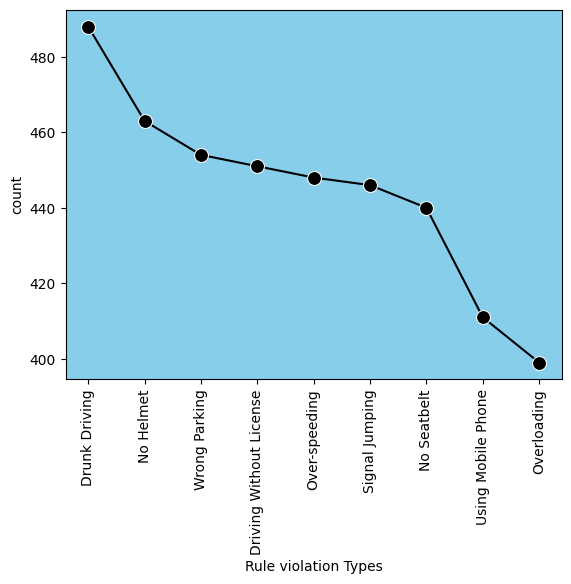

In [21]:
ax=sns.lineplot(violation_df,x="Violation_Type",y="count",marker="o",color="black",markersize=10)
ax.set_facecolor("skyblue")
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_xlabel("Rule violation Types")
ax1.set_xlabel("Number of Violants")

In [22]:
df.head(2)

,Violation_Type,Fine_Amount,Location,Date,Vehicle_Type,Registration_State,Driver_Age,Driver_Gender,License_Type,Weather_Condition,Road_Condition,Officer_ID,Issuing_Agency,License_Validity,Helmet_Worn,Seatbelt_Worn,Traffic_Light_Status,Speed_Limit,Recorded_Speed,Alcohol_Level,Court_Appearance_Required,Previous_Violations,Comments,Year
0,Overloading,4544,Karnataka,2023-01-01,Car,West Bengal,25,Male,Commercial,Cloudy,Slippery,OFF9971,Local Police,Valid,NaN,Yes,Green,100,95,0.03,Yes,3,Repeat Offender,2023
1,Driving Without License,2776,Punjab,2023-01-02,Scooter,Tamil Nadu,32,Female,Commercial,Rainy,Dry,OFF6000,Highway Patrol,Valid,NaN,No,Green,40,48,0.45,No,2,Repeat Offender,2023


Text(0, 0.5, 'Alcohol Level')

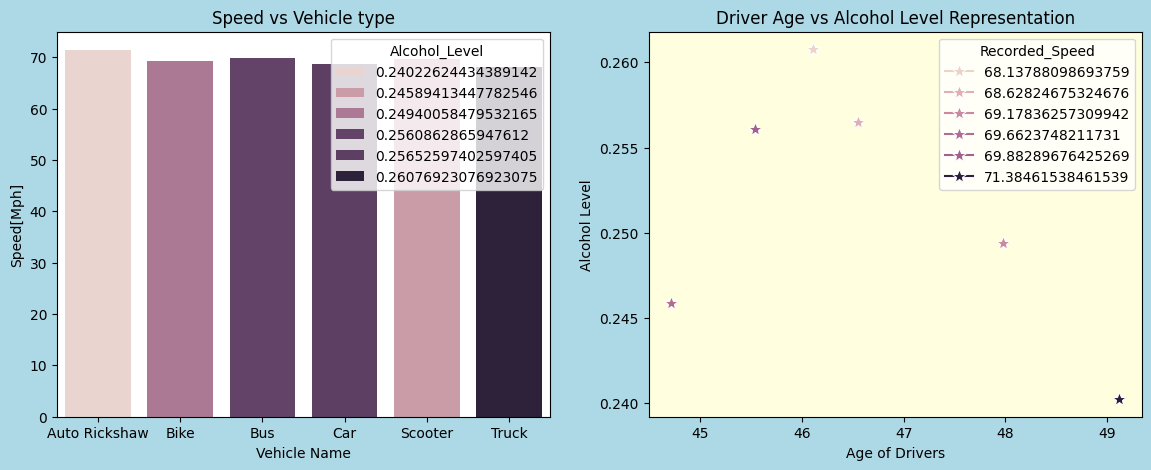

In [23]:
grouped_data=df.groupby("Vehicle_Type")[["Recorded_Speed","Alcohol_Level","Driver_Age"]].mean()
fig,ax=plt.subplots(1,2,figsize=(14,5))
sns.barplot(data=grouped_data, x="Vehicle_Type", y="Recorded_Speed",hue="Alcohol_Level",ax=ax[0])
ax[0].set_title("Speed vs Vehicle type")
ax[0].set_xlabel("Vehicle Name")
ax[0].set_ylabel("Speed[Mph]")
ax[0].set_facecolor("white")
sns.lineplot(data=grouped_data,x="Driver_Age",y="Alcohol_Level",hue="Recorded_Speed",marker="*",markersize=10,ax=ax[1])
fig.patch.set_facecolor('lightblue')
ax[1].set_facecolor('lightyellow')
ax[1].set_title("Driver Age vs Alcohol Level Representation")
ax[1].set_xlabel("Age of Drivers")
ax[1].set_ylabel("Alcohol Level")

In [24]:
grouped_data_next=df.groupby(["Vehicle_Type","Driver_Age"])[["Recorded_Speed","Alcohol_Level"]].mean()
grouped_data_next


Recorded_Speed  Alcohol_Level
Vehicle_Type  Driver_Age                               
Auto Rickshaw 18               70.600000       0.265000
              19               82.444444       0.190000
              20               58.625000       0.201250
              21               79.200000       0.234000
              22               56.714286       0.297143
...                                  ...            ...
Truck         71               83.181818       0.171818
              72               48.363636       0.244545
              73               54.428571       0.164286
              74               56.411765       0.308824
              75               76.500000       0.306429

[348 rows x 2 columns]

In [25]:
df=df.drop("Comments",axis=1)


<BarContainer object of 2 artists>

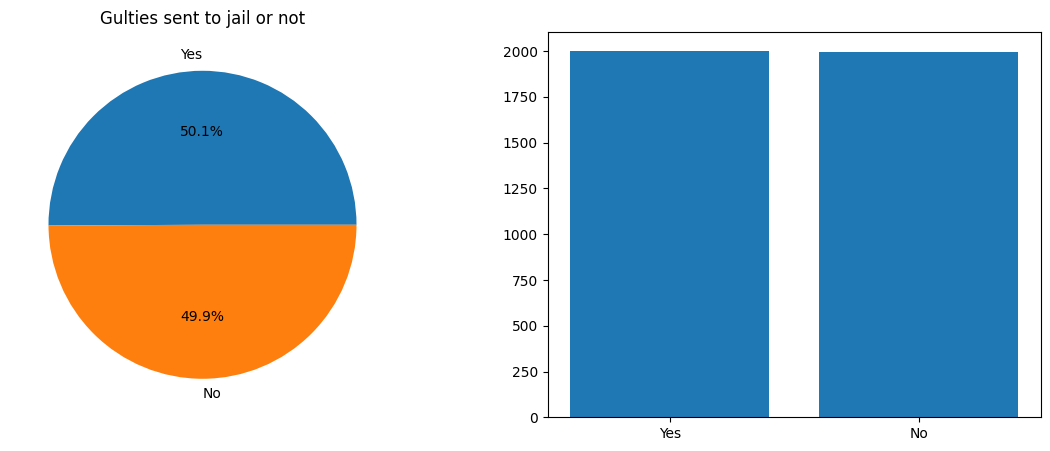

In [26]:
court=df["Court_Appearance_Required"].value_counts()
fig,ax=plt.subplots(1,2,figsize=(14,5))
ax[0].pie(court,labels=(["Yes","No"]),autopct='%1.1f%%')
ax[0].set_title("Gulties sent to jail or not")
ax[1].bar(["Yes","No"],height=court)

In [27]:
df.head()

,Violation_Type,Fine_Amount,Location,Date,Vehicle_Type,Registration_State,Driver_Age,Driver_Gender,License_Type,Weather_Condition,Road_Condition,Officer_ID,Issuing_Agency,License_Validity,Helmet_Worn,Seatbelt_Worn,Traffic_Light_Status,Speed_Limit,Recorded_Speed,Alcohol_Level,Court_Appearance_Required,Previous_Violations,Year
0,Overloading,4544,Karnataka,2023-01-01,Car,West Bengal,25,Male,Commercial,Cloudy,Slippery,OFF9971,Local Police,Valid,NaN,Yes,Green,100,95,0.03,Yes,3,2023
1,Driving Without License,2776,Punjab,2023-01-02,Scooter,Tamil Nadu,32,Female,Commercial,Rainy,Dry,OFF6000,Highway Patrol,Valid,NaN,No,Green,40,48,0.45,No,2,2023
2,Using Mobile Phone,4785,Maharashtra,2023-01-03,Scooter,Tamil Nadu,67,Female,Two-Wheeler,Clear,Potholes,OFF5706,Local Police,Valid,Yes,Yes,Yellow,80,26,0.31,Yes,4,2023
3,No Seatbelt,1138,Uttar Pradesh,2023-01-04,Car,Uttar Pradesh,46,Male,Learner,Rainy,Wet,OFF5575,Highway Patrol,Valid,No,No,Green,100,115,0.09,No,5,2023
4,Over-speeding,1610,Karnataka,2023-01-05,Truck,Delhi,63,Female,Four-Wheeler,Foggy,Potholes,OFF7147,Traffic Police,Valid,NaN,No,Red,30,115,0.28,Yes,0,2023


In [28]:
df=df.drop(columns="Date")


In [29]:
df.head()

,Violation_Type,Fine_Amount,Location,Vehicle_Type,Registration_State,Driver_Age,Driver_Gender,License_Type,Weather_Condition,Road_Condition,Officer_ID,Issuing_Agency,License_Validity,Helmet_Worn,Seatbelt_Worn,Traffic_Light_Status,Speed_Limit,Recorded_Speed,Alcohol_Level,Court_Appearance_Required,Previous_Violations,Year
0,Overloading,4544,Karnataka,Car,West Bengal,25,Male,Commercial,Cloudy,Slippery,OFF9971,Local Police,Valid,NaN,Yes,Green,100,95,0.03,Yes,3,2023
1,Driving Without License,2776,Punjab,Scooter,Tamil Nadu,32,Female,Commercial,Rainy,Dry,OFF6000,Highway Patrol,Valid,NaN,No,Green,40,48,0.45,No,2,2023
2,Using Mobile Phone,4785,Maharashtra,Scooter,Tamil Nadu,67,Female,Two-Wheeler,Clear,Potholes,OFF5706,Local Police,Valid,Yes,Yes,Yellow,80,26,0.31,Yes,4,2023
3,No Seatbelt,1138,Uttar Pradesh,Car,Uttar Pradesh,46,Male,Learner,Rainy,Wet,OFF5575,Highway Patrol,Valid,No,No,Green,100,115,0.09,No,5,2023
4,Over-speeding,1610,Karnataka,Truck,Delhi,63,Female,Four-Wheeler,Foggy,Potholes,OFF7147,Traffic Police,Valid,NaN,No,Red,30,115,0.28,Yes,0,2023


In [30]:
license=pd.DataFrame(df.License_Validity.value_counts()).reset_index()
license.columns = ['License_Validity', 'count']
import plotly.express as px
license

,License_Validity,count
0,Suspended,1371
1,Valid,1322
2,Expired,1307


In [31]:

fig = px.bar(license, y='License_Validity', x='count', title="License Validity vs Count")
fig.update_layout(
    width=800, 
    height=300,
    xaxis_title="Count",
    yaxis_title="license"
)


In [32]:
df.Alcohol_Level.max()
df.Alcohol_Level.min()
df["Alcoholic"]=df["Alcohol_Level"]>0
df.Alcoholic.value_counts()


Alcoholic
True     3960
False      40
Name: count, dtype: int64

In [33]:


df_1=df.Alcoholic.value_counts().reset_index()
df_1.columns=["Alcoholic","count"]
import plotly_express as px 
set_fig=px.bar(df_1,x="count",y="Alcoholic")
set_fig.update_layout(xaxis_title="Number of violents who are alcoholic",yaxis_title="True False based on alcoholic or not",title="Representation of violents who are alcoholic and non alcoholic")
set_fig.show()

In [34]:
df["Overspeed"]=df["Recorded_Speed"]>df["Speed_Limit"]
df.head()
df.Overspeed.value_counts()


df["Overspeed_and_Alcoholic"]=df["Overspeed"] & df["Alcoholic"]
df.Overspeed_and_Alcoholic.value_counts()

df.columns

Index(['Violation_Type', 'Fine_Amount', 'Location', 'Vehicle_Type',
       'Registration_State', 'Driver_Age', 'Driver_Gender', 'License_Type',
       'Weather_Condition', 'Road_Condition', 'Officer_ID', 'Issuing_Agency',
       'License_Validity', 'Helmet_Worn', 'Seatbelt_Worn',
       'Traffic_Light_Status', 'Speed_Limit', 'Recorded_Speed',
       'Alcohol_Level', 'Court_Appearance_Required', 'Previous_Violations',
       'Year', 'Alcoholic', 'Overspeed', 'Overspeed_and_Alcoholic'],
      dtype='object')

In [35]:
df_clean=df.drop(["Vehicle_Type","Registration_State","Driver_Gender","License_Type","Weather_Condition","Road_Condition","Officer_ID", 'Issuing_Agency',
       'License_Validity', 'Helmet_Worn', 'Seatbelt_Worn',
       'Traffic_Light_Status','Court_Appearance_Required', 'Previous_Violations',
       'Year',"Location"],axis=1)

In [36]:
def get_alcoholic(x):
    if x==True:
        return "Yes"
    elif x==False:
        return "No"
    else:
        return "No"

df_clean["Alcoholic"]=df_clean["Alcoholic"].apply(lambda x:get_alcoholic(x))




def get_overspeed(x):
    if x==True:
        return "Yes"
    elif x==False:
        return "No"
    else:
        return "No"

df_clean["Overspeed"]=df_clean["Overspeed"].apply(lambda x:get_overspeed(x))

def get_overspeednd(x):
    if x==True:
        return "Yes"
    elif x==False:
        return "No"
    else:
        return "No"

df_clean["Overspeed_and_Alcoholic"]=df_clean["Overspeed_and_Alcoholic"].apply(lambda x:get_overspeednd(x))

In [37]:
from sklearn.model_selection import train_test_split

train_df,test_df=train_test_split(df_clean,test_size=0.2)
train_df.shape

(3200, 9)

<Axes: >

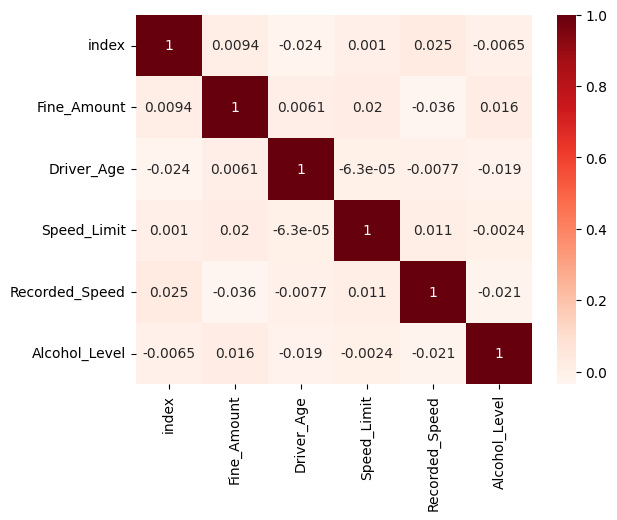

In [38]:
numerical_col=df_clean.select_dtypes(include=["number"]).reset_index()
catagorical_col=df_clean.select_dtypes('object').reset_index()
sns.heatmap(numerical_col.corr(),cmap="Reds",annot=True)

In [39]:
#Lets select the target columns and input columns
input_col = list(train_df.columns)
input_col = [col for i, col in enumerate(input_col) if i != 4]
print(input_col)

target_col="Recorded_Speed"
df_clean.head(2)

['Violation_Type', 'Fine_Amount', 'Driver_Age', 'Speed_Limit', 'Alcohol_Level', 'Alcoholic', 'Overspeed', 'Overspeed_and_Alcoholic']


,Violation_Type,Fine_Amount,Driver_Age,Speed_Limit,Recorded_Speed,Alcohol_Level,Alcoholic,Overspeed,Overspeed_and_Alcoholic
0,Overloading,4544,25,100,95,0.03,Yes,No,No
1,Driving Without License,2776,32,40,48,0.45,Yes,Yes,Yes


In [40]:
train_inputs=train_df[input_col].copy()
train_target=train_df[target_col].copy()

In [41]:
type(train_target)

pandas.core.series.Series

In [42]:
#Convert_colomns to numeric dataframe 
numeric_col1=train_df.select_dtypes(include=["number"])
catagorical_column1=train_inputs.select_dtypes('object')

In [43]:
numeric_col1.describe()
numeric_col_final=list(numeric_col1)
numeric_col_final

['Fine_Amount', 'Driver_Age', 'Speed_Limit', 'Recorded_Speed', 'Alcohol_Level']

In [44]:
catagorical_col=list(catagorical_column1)
train_df[catagorical_col].describe()

,Violation_Type,Alcoholic,Overspeed,Overspeed_and_Alcoholic
count,3200,3200,3200,3200
unique,9,2,2,2
top,Drunk Driving,Yes,Yes,Yes
freq,382,3167,1874,1853


In [45]:
train_df[catagorical_col].Violation_Type.unique()


array(['Using Mobile Phone', 'No Helmet', 'Signal Jumping', 'No Seatbelt',
       'Driving Without License', 'Drunk Driving', 'Over-speeding',
       'Overloading', 'Wrong Parking'], dtype=object)

In [46]:
train_df.reset_index()
train_inputs.reset_index()
train_target.reset_index()

,index,Recorded_Speed
0,72,77
1,2811,60
2,836,61
3,3183,88
4,3181,71
...,...,...
3195,3654,26
3196,3491,68
3197,3077,41
3198,1440,38


In [47]:
#Lets train the dataseries
#Replacing nun values with mean we will use imputer for this 

from sklearn.impute import SimpleImputer

imputer=SimpleImputer(strategy="mean")

numerical_col=list(numeric_col_final)
df_clean[numeric_col_final].isna().sum()

Fine_Amount       0
Driver_Age        0
Speed_Limit       0
Recorded_Speed    0
Alcohol_Level     0
dtype: int64

In [48]:
imputer.fit(df_clean[numeric_col_final])
list(imputer.statistics_)

[np.float64(2529.82125),
 np.float64(46.658),
 np.float64(59.8175),
 np.float64(69.479),
 np.float64(0.2514075)]

In [49]:
train_df[numeric_col_final]=imputer.transform(train_df[numeric_col_final])
train_df[numeric_col_final].describe()

,Fine_Amount,Driver_Age,Speed_Limit,Recorded_Speed,Alcohol_Level
count,3200.000000,3200.000000,3200.000000,3200.000000,3200.000000
mean,2525.704688,46.477812,59.775000,69.167812,0.251575
std,1415.362995,16.881049,23.697307,29.500695,0.143525
min,100.000000,18.000000,30.000000,20.000000,0.000000
25%,1281.000000,32.000000,40.000000,43.000000,0.130000
50%,2500.500000,46.000000,60.000000,69.000000,0.250000
75%,3706.750000,61.000000,80.000000,95.000000,0.380000
max,5000.000000,75.000000,100.000000,120.000000,0.500000


# Scaling neumeric feature

In [50]:
numeric_col_final=train_inputs.select_dtypes(include=["number"])
numeric_col_final=list(numeric_col_final)
numeric_col_final

['Fine_Amount', 'Driver_Age', 'Speed_Limit', 'Alcohol_Level']

In [51]:
from sklearn.preprocessing import MinMaxScaler

In [52]:
scaler=MinMaxScaler()

In [53]:
scaler.fit(train_df[numeric_col_final])

MinMaxScaler()

In [54]:
scaler.data_max_
scaler.data_min_

array([100.,  18.,  30.,   0.])

In [55]:
train_inputs[numeric_col_final]=scaler.transform(train_inputs[numeric_col_final])
train_inputs

,Violation_Type,Fine_Amount,Driver_Age,Speed_Limit,Alcohol_Level,Alcoholic,Overspeed,Overspeed_and_Alcoholic
72,Using Mobile Phone,0.879592,0.596491,0.142857,0.30,Yes,Yes,Yes
2811,No Helmet,0.843878,0.210526,0.428571,0.72,Yes,No,No
836,Signal Jumping,0.843878,0.245614,0.142857,0.14,Yes,Yes,Yes
3183,Using Mobile Phone,0.061837,0.035088,0.285714,0.32,Yes,Yes,Yes
3181,No Seatbelt,0.066122,0.280702,0.000000,0.94,Yes,Yes,Yes
...,...,...,...,...,...,...,...,...
3654,Drunk Driving,0.005102,0.333333,0.142857,0.20,Yes,No,No
3491,Overloading,0.433469,0.842105,0.000000,0.36,Yes,Yes,Yes
3077,Using Mobile Phone,0.641224,0.000000,0.285714,0.76,Yes,No,No
1440,Wrong Parking,0.796122,0.403509,0.000000,1.00,Yes,Yes,Yes


# ENCODING CATAGORICAL DATA SET 

In [56]:
train_df[catagorical_col]
from sklearn.preprocessing import OneHotEncoder

In [57]:
encoder=OneHotEncoder(sparse_output=False,handle_unknown='ignore')

In [58]:
encoder.fit(train_df[catagorical_col])

OneHotEncoder(handle_unknown='ignore', sparse_output=False)

In [59]:
encoder.categories_

[array(['Driving Without License', 'Drunk Driving', 'No Helmet',
        'No Seatbelt', 'Over-speeding', 'Overloading', 'Signal Jumping',
        'Using Mobile Phone', 'Wrong Parking'], dtype=object),
 array(['No', 'Yes'], dtype=object),
 array(['No', 'Yes'], dtype=object),
 array(['No', 'Yes'], dtype=object)]

In [64]:
encoded_cols=list(encoder.get_feature_names_out(catagorical_col))
print(encoded_cols)
catagorical_col

['Violation_Type_Driving Without License', 'Violation_Type_Drunk Driving', 'Violation_Type_No Helmet', 'Violation_Type_No Seatbelt', 'Violation_Type_Over-speeding', 'Violation_Type_Overloading', 'Violation_Type_Signal Jumping', 'Violation_Type_Using Mobile Phone', 'Violation_Type_Wrong Parking', 'Alcoholic_No', 'Alcoholic_Yes', 'Overspeed_No', 'Overspeed_Yes', 'Overspeed_and_Alcoholic_No', 'Overspeed_and_Alcoholic_Yes']


['Violation_Type', 'Alcoholic', 'Overspeed', 'Overspeed_and_Alcoholic']

In [61]:
encoded_array=encoder.transform(train_df[catagorical_col])
train_inputs[encoded_cols]=encoder.transform(train_inputs[catagorical_col])
train_inputs

,Violation_Type,Fine_Amount,Driver_Age,Speed_Limit,Alcohol_Level,Alcoholic,Overspeed,Overspeed_and_Alcoholic,Violation_Type_Driving Without License,Violation_Type_Drunk Driving,Violation_Type_No Helmet,Violation_Type_No Seatbelt,Violation_Type_Over-speeding,Violation_Type_Overloading,Violation_Type_Signal Jumping,Violation_Type_Using Mobile Phone,Violation_Type_Wrong Parking,Alcoholic_No,Alcoholic_Yes,Overspeed_No,Overspeed_Yes,Overspeed_and_Alcoholic_No,Overspeed_and_Alcoholic_Yes
72,Using Mobile Phone,0.879592,0.596491,0.142857,0.30,Yes,Yes,Yes,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
2811,No Helmet,0.843878,0.210526,0.428571,0.72,Yes,No,No,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
836,Signal Jumping,0.843878,0.245614,0.142857,0.14,Yes,Yes,Yes,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
3183,Using Mobile Phone,0.061837,0.035088,0.285714,0.32,Yes,Yes,Yes,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
3181,No Seatbelt,0.066122,0.280702,0.000000,0.94,Yes,Yes,Yes,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3654,Drunk Driving,0.005102,0.333333,0.142857,0.20,Yes,No,No,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
3491,Overloading,0.433469,0.842105,0.000000,0.36,Yes,Yes,Yes,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
3077,Using Mobile Phone,0.641224,0.000000,0.285714,0.76,Yes,No,No,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
1440,Wrong Parking,0.796122,0.403509,0.000000,1.00,Yes,Yes,Yes,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0


In [62]:
print(train_target.shape)
print(train_inputs.shape)

(3200,)
(3200, 23)


In [ ]:
train_inputs.to_parquet("train_inputs.parquet")

In [65]:
pd.DataFrame(train_target).to_parquet("train_target.parquet")

In [67]:
train_input=pd.read_parquet("./train_inputs.parquet")
train_targets=pd.read_parquet("./train_target.parquet")

In [70]:
from sklearn.linear_model import LogisticRegression

In [71]:
model=LogisticRegression(solver="liblinear")

In [78]:
model.fit(train_inputs[numeric_col_final+encoded_cols],train_target)   #Targets can be catagorical be inputs cannot be catagorical

LogisticRegression(solver='liblinear')

In [86]:
model.coef_.tolist()
train_inputs[numeric_col_final+encoded_cols]
print(train_target)

72      77
2811    60
836     61
3183    88
3181    71
        ..
3654    26
3491    68
3077    41
1440    38
1046    48
Name: Recorded_Speed, Length: 3200, dtype: int64


In [90]:
list(model.intercept_)
model.intercept_[0]

np.float64(-1.630402942430967)

<Axes: xlabel='weight', ylabel='feature'>

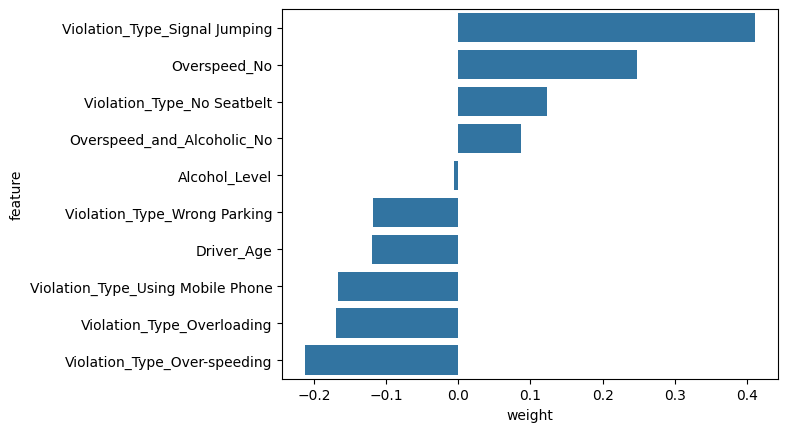

In [ ]:
weight_df=pd.DataFrame({
        "feature":numeric_col_final+encoded_cols,
         "weight":model.coef_.tolist()[0]


})



weight_df_10=weight_df.sort_values("weight",ascending=False).head(10)
sns.barplot(data=weight_df_10,x="weight",y="feature")

<Axes: xlabel='weight', ylabel='feature'>

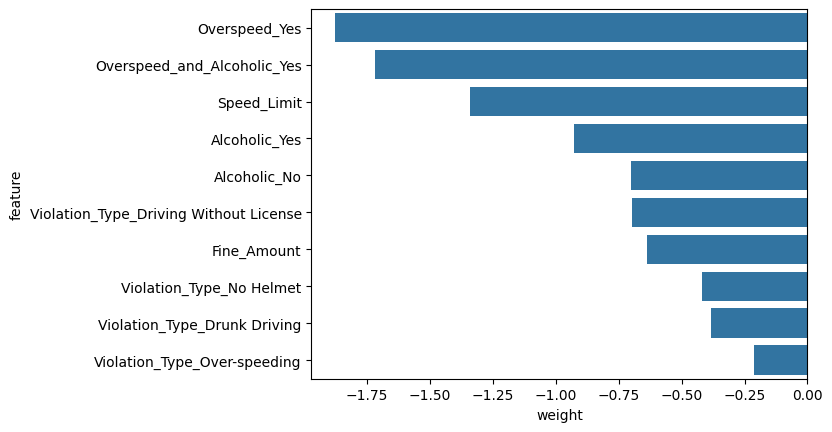

In [119]:

weight_df_11=weight_df.sort_values("weight",ascending=True).head(10)
sns.barplot(data=weight_df_11,x="weight",y="feature")

<Axes: xlabel='weight', ylabel='feature'>

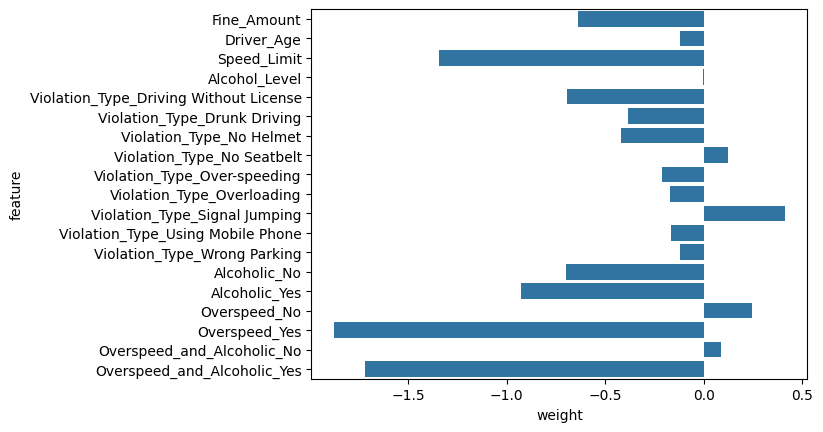

In [120]:
sns.barplot(data=weight_df,x="weight",y="feature")

In [143]:
prediction=model.predict(train_inputs[numeric_col_final+encoded_cols])
list(train_df[target_col])


[77.0,
 60.0,
 61.0,
 88.0,
 71.0,
 41.0,
 51.0,
 33.0,
 82.0,
 93.0,
 61.0,
 36.0,
 53.0,
 98.0,
 113.0,
 88.0,
 114.0,
 108.0,
 76.0,
 106.0,
 61.0,
 68.0,
 28.0,
 110.0,
 25.0,
 88.0,
 53.0,
 107.0,
 117.0,
 64.0,
 78.0,
 113.0,
 30.0,
 77.0,
 115.0,
 75.0,
 73.0,
 76.0,
 78.0,
 82.0,
 51.0,
 113.0,
 38.0,
 62.0,
 98.0,
 97.0,
 62.0,
 62.0,
 105.0,
 56.0,
 81.0,
 72.0,
 116.0,
 69.0,
 30.0,
 20.0,
 22.0,
 42.0,
 61.0,
 24.0,
 89.0,
 92.0,
 111.0,
 26.0,
 112.0,
 46.0,
 73.0,
 57.0,
 74.0,
 64.0,
 110.0,
 92.0,
 66.0,
 76.0,
 55.0,
 45.0,
 68.0,
 116.0,
 31.0,
 21.0,
 48.0,
 90.0,
 72.0,
 77.0,
 76.0,
 37.0,
 20.0,
 40.0,
 111.0,
 54.0,
 72.0,
 76.0,
 31.0,
 33.0,
 53.0,
 67.0,
 22.0,
 119.0,
 33.0,
 20.0,
 57.0,
 73.0,
 27.0,
 88.0,
 27.0,
 78.0,
 55.0,
 27.0,
 104.0,
 25.0,
 23.0,
 20.0,
 99.0,
 50.0,
 55.0,
 86.0,
 52.0,
 85.0,
 45.0,
 84.0,
 97.0,
 66.0,
 94.0,
 84.0,
 82.0,
 39.0,
 114.0,
 110.0,
 45.0,
 67.0,
 25.0,
 103.0,
 58.0,
 70.0,
 33.0,
 42.0,
 62.0,
 42.0,
 49.0,
 79.0

In [182]:
print(list(prediction))
len(prediction)
columns=["Index","Predicted_Speed"]
prediction_dataframe=pd.DataFrame(prediction,columns=["Predicted_speed"])
prediction_dataframehead=prediction_dataframe.head(10)
train_target_dataframe=pd.DataFrame(train_target)


[np.int64(82), np.int64(30), np.int64(82), np.int64(110), np.int64(78), np.int64(32), np.int64(38), np.int64(30), np.int64(115), np.int64(84), np.int64(90), np.int64(26), np.int64(29), np.int64(72), np.int64(90), np.int64(106), np.int64(81), np.int64(84), np.int64(115), np.int64(104), np.int64(82), np.int64(48), np.int64(23), np.int64(70), np.int64(25), np.int64(82), np.int64(33), np.int64(115), np.int64(106), np.int64(38), np.int64(78), np.int64(102), np.int64(29), np.int64(109), np.int64(95), np.int64(115), np.int64(82), np.int64(82), np.int64(41), np.int64(82), np.int64(82), np.int64(82), np.int64(20), np.int64(110), np.int64(117), np.int64(70), np.int64(115), np.int64(84), np.int64(82), np.int64(73), np.int64(117), np.int64(95), np.int64(109), np.int64(84), np.int64(20), np.int64(70), np.int64(20), np.int64(106), np.int64(71), np.int64(28), np.int64(111), np.int64(102), np.int64(114), np.int64(32), np.int64(116), np.int64(82), np.int64(84), np.int64(46), np.int64(111), np.int64(78)

In [221]:
import pandas as pd
import plotly.express as px

combined_dataframe=merged_df = combined_dataframe = pd.merge(prediction_dataframe, 
                              train_target_dataframe, 
                              left_index=True, right_index=True)
final_df=combined_dataframe.head(20)
final_df

,Predicted_speed,Recorded_Speed
0,82,95
1,30,48
2,82,26
3,110,115
4,78,115
5,32,87
6,38,24
7,30,119
9,84,114
10,90,107


Text(0, 0.5, 'Speed')

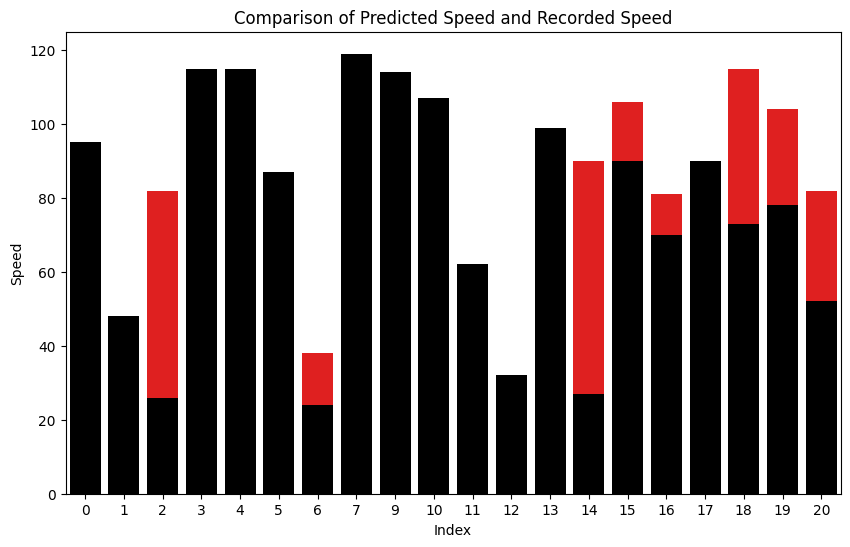

In [240]:
plt.figure(figsize=(10,6))


fig=sns.barplot(final_df,y="Predicted_speed",x=final_df.index,color="red")
fig=sns.barplot(final_df,y="Recorded_Speed",x=final_df.index,color="black")
plt.title("Comparison of Predicted Speed and Recorded Speed")
plt.xlabel("Index")
plt.ylabel("Speed")


In [245]:
from sklearn.metrics import accuracy_score
accuracy_score(train_target,prediction)

0.0565625